In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import math
from word2number import w2n
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [111]:
hp = pd.read_csv('../data/ml/homeprices.csv')
hp.head()


,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


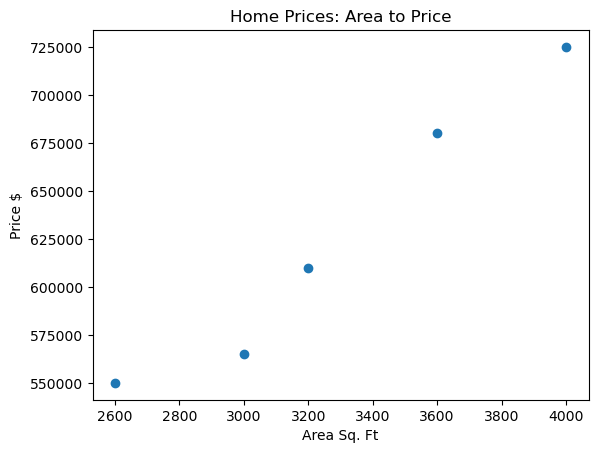

In [112]:
#make a scatterplot#
%matplotlib inline

plt.xlabel('Area Sq. Ft')
plt.ylabel('Price $')
plt.title('Home Prices: Area to Price')
plt.scatter(hp[['area']],hp.price)
plt.show()


In [116]:
#Train and fit linear regression model
lg = linear_model.LinearRegression()
lg.fit(hp[['area']].values,hp.price)

print("\n y = {}x + {}".format(lg.coef_,lg.intercept_))


 y = [135.78767123]x + 180616.43835616432


In [117]:
#Predict on a linear model
lg.predict([[3300]])

array([628715.75342466])

In [118]:
a = pd.read_csv('../data/ml/areas.csv')
a['price'] = lg.predict(a[['area']])
a

/Users/reddy/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,area,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [119]:
#write to new csv
a.to_csv("../data/ml/prediction.csv",index=False)

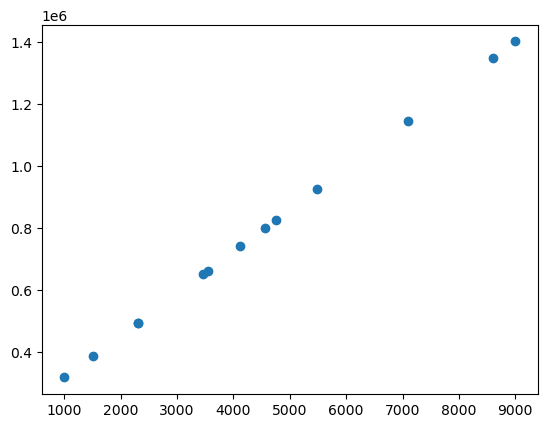

In [120]:
#plot a scatter plot
plt.scatter(a[['area']],a.price)

In [121]:
cdf = pd.read_csv('../data/ml/canada_per_capita_income.csv')

cdf = cdf.rename(columns={'per capita income (US$)': 'pcincome'})
cdf.head()

,year,pcincome
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [123]:
lg.fit(cdf[['year']].values,cdf.pcincome)
print(lg.predict([[2020]]))

[41288.69409442]


In [124]:
#multi variable Linear Regression
hp2 = pd.read_csv('../data/ml/homeprices2.csv')
hp2.head()


,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [125]:
import math

#Replace NAN values with Median for bedrooms

hp2.bedrooms = hp2.bedrooms.fillna(math.floor(hp2.bedrooms.median()))
hp2

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [126]:
lgm = linear_model.LinearRegression()
lgm.fit(hp2[['area','bedrooms','age']].values,hp2.price)

LinearRegression()

In [127]:
lgm.predict([[3000, 3, 40]])

array([498408.25158031])

In [128]:
lgm.predict([[2500, 4, 5]])

array([578876.03748933])

In [129]:
#Multiple Linear regression for hiring 
hir = pd.read_csv('../data/ml/hiring.csv')
hir.isnull().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [130]:
hir.head(8)

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [131]:
hir.experience = hir.experience.fillna('zero')
hir['test_score(out of 10)'] = hir['test_score(out of 10)'].fillna(math.floor(hir['test_score(out of 10)'].mean()))
hir.head(8)

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [132]:
hir.experience = hir.experience.apply(w2n.word_to_num)
hir.head(8)

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [133]:
lgm2 = linear_model.LinearRegression()
lgm2.fit(hir[['experience','test_score(out of 10)','interview_score(out of 10)']].values,hir['salary($)'])
print("Coeff : {} and Intercept : {}".format(lgm2.coef_,lgm2.intercept_))

Coeff : [2922.26901502 2221.30909959 2147.48256637] and Intercept : 14992.65144669314


In [134]:
lgm2.predict([[2,9,6]])

array([53713.86677124])

In [135]:
lgm2.predict([[12,10,10]])

array([93747.79628651])

In [136]:
#dump the model to a pickle file (also joblib from sklearn is an optio)
with open('multi_lin_reg_hiring','wb') as f:
    pickle.dump(lgm2,f)
    
#read the model from a pickle file and predict again
with open('multi_lin_reg_hiring','rb') as f2:
    lgm2_loaded = pickle.load(f2)
    
lgm2_loaded.predict([[2,9,6]])

array([53713.86677124])

In [137]:
#One hot encoding for Nominal Categorical Variables
hpohe = pd.read_csv('../data/ml/homeprices-ohe.csv')
hpohe.head()

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000


In [138]:
dummies = pd.get_dummies(hpohe.town)
merged = pd.concat([hpohe,dummies],axis =1)
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [139]:
merged = merged.drop(['town','west windsor'], axis = 1)
merged

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [140]:
lgohe = linear_model.LinearRegression()
X=merged.drop(['price'],axis=1)
y=merged.price

lgohe.fit(X.values,y)
lgohe.predict([[2800,0,1]])

array([590775.63964739])

In [141]:
#Score a models performance
lgohe.score(X.values,y)

0.9573929037221873

In [159]:
hpohe2 = hpohe
le = LabelEncoder()
hpohe2.town = le.fit_transform(hpohe2.town)
hpohe2

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [166]:
X = hpohe2[['town','area']].values
y=hpohe2.price


array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [179]:
ohe = OneHotEncoder()
X= ohe.fit_transform(hpohe2[['town']]).toarray()
hpohe2.join(pd.DataFrame(X)).drop(['town'],axis=1)

,area,price,0,1,2
0,2600,550000,1.0,0.0,0.0
1,3000,565000,1.0,0.0,0.0
2,3200,610000,1.0,0.0,0.0
3,3600,680000,1.0,0.0,0.0
4,4000,725000,1.0,0.0,0.0
5,2600,585000,0.0,0.0,1.0
6,2800,615000,0.0,0.0,1.0
7,3300,650000,0.0,0.0,1.0
8,3600,710000,0.0,0.0,1.0
9,2600,575000,0.0,1.0,0.0


In [181]:
#One Hot Encoder on CarPrices
cpohe = pd.read_csv('../data/ml/carprices.csv')
cpohe.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [188]:
#cpohe = pd.concat(cpohe, pd.get_dummies(cpohe['Car Model']),axis=1)
#cpohe\
dummies = pd.get_dummies(cpohe['Car Model'])
merged = pd.concat([cpohe,dummies],axis=1)
final = merged.drop(['Car Model','Mercedez Benz C class'],axis=1)
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [190]:
X=final.drop(['Sell Price($)'],axis=1)
y=final['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [203]:

cplin = linear_model.LinearRegression()
cplin.fit(X.values,y)
cplin.score(X.values,y)

0.9417050937281083

In [204]:
#price of mercedes benz that is 4 years old with 45000 mileage
cplin.predict([[45000,4,0,0]])

array([36991.31721061])

In [205]:
#Price of BMW X5 that is 7 yr old with mileage 86000
cplin.predict([[86000,7,0,1]])

array([11080.74313219])